# Demo:
# Markov-models from the RN.SimpleTransSpDf pandas.DataFrame

Sometimes User-Input is optional in the code to check the correctness of the methods with various inputs. These fields will look like this:<br><br>
\###########################<br>
\#-------------------------------------#<br>
user_input =<br>
\#-------------------------------------#<br>
\###########################<br>

We will build a<br>
**abstractions_df**<br>
**transitions_df**<br>
containing information information on the organizations and transitions betwwen them<br>

I will show different approaches to derive markov models where species added to the system do not necessarily have to connect to the current organization.

In [1]:
# installing locally the library
import sys
!{sys.executable} -m pip install ../../pyRN/. --quiet --user #installation of library in local enviorment

# pyRN imports
from pyRN import pyRN
from pyRN.SEA import markov
from pyRN.SEA import newdataframes
from pyRN.SEA import plot_markov_new

# inbuilt imports
from bitarray import bitarray
from bitarray import frozenbitarray
from IPython.core.display import display, HTML
import matplotlib.pyplot
import numpy
import pandas
import pickle
import random

## Generation of the RN.SimpleTransSpDf pandas.DataFrame

Parameters for the calculation of the RN.SimpleTransSpDf pandas.DataFrame:<br>

- orglist (list), default: RN.SynStrOrgListBtArray, list of organizations
- pert_type (str) options: "species" or "generators", default: "species", dertermines if perturbations consist of single species or generators
- pert_size (int), the maximum size of a perturbation
- conn (boolean), default: True, determines if additive perturbations must connect to the current system
- closure (boolean), default: True, determines if the closure operation is applied to the perturbation
- include_empty_set (boolean), default: False, determines  if the empty_set is included even when it is not an organization)

In [2]:
# Setting network
# path = r'C:\Users\simon\Documents\pyRN\networks\non_connected_example.txt'
path = "../networks/non_connected_example.txt"
RN=pyRN.setFromText(path)
RN.setSpConnMat()
# Calculation of the generators
RN.setGenerators()
# Calculation of the Closed Reactive Strucutre
RN.setSynStr()
# Calculation of transition events
RN.setSimpleTransDict(orglist=RN.SynStrOrgListBtArray,pert_type="species",pert_size=6,conn=False,closure=True, include_empty_set=True)
display(RN.SimpleTransSpDf)

1  closures of  5
2  closures of  5
3  closures of  5
4  closures of  5
5  closures of  5
1  equivalance classes of  5
2  equivalance classes of  5
3  equivalance classes of  5
4  equivalance classes of  5
5  equivalance classes of  5
1  bitarrays assignations of  3
2  bitarrays assignations of  3
3  bitarrays assignations of  3
0  connectivity assingments of  3
1  connectivity assingments of  3
2  connectivity assingments of  3
level:  1 from  3 , node:  1  from  2
level:  1 from  3 , node:  2  from  2
level:  2 from  3 , node:  1  from  2
level:  2 from  3 , node:  2  from  2
level:  3 from  3 , node:  1  from  1
Simple Traansition for org 1 of 4
Simple Traansition for org 2 of 4
Simple Traansition for org 3 of 4
Simple Traansition for org 4 of 4


,initial state,perturbation,final perturbed state,convergent state
0,"[1, 1, 1, 0, 0, 0]","[1, 1, 1, 0, 0, 0]","[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]"
1,"[1, 1, 1, 0, 0, 0]","[0, 1, 1, 0, 0, 0]","[1, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]"
2,"[1, 1, 1, 0, 0, 0]","[1, 0, 1, 0, 0, 0]","[0, 1, 1, 0, 0, 0]","[0, 0, 0, 0, 0, 0]"
3,"[1, 1, 1, 0, 0, 0]","[1, 1, 0, 0, 0, 0]","[0, 0, 1, 0, 0, 0]","[0, 0, 0, 0, 0, 0]"
4,"[1, 1, 1, 0, 0, 0]","[1, 1, 1, 1, 0, 0]","[0, 0, 0, 1, 1, 1]","[0, 0, 0, 1, 1, 1]"
...,...,...,...,...
247,"[0, 0, 0, 0, 0, 0]","[1, 1, 1, 0, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]"
248,"[0, 0, 0, 0, 0, 0]","[1, 1, 0, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]"
249,"[0, 0, 0, 0, 0, 0]","[1, 0, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]"
250,"[0, 0, 0, 0, 0, 0]","[0, 1, 1, 1, 1, 1]","[0, 1, 1, 1, 1, 1]","[0, 0, 0, 1, 1, 1]"


### Saving / Loading

In [3]:
def pkl(object, path):
    '''
    Store python object using pickle at given path
    
        Parameters:
            object (python object)
            path   (string), filepath
    '''
    essig = open(path, 'wb')
    pickle.dump(object, essig)
    essig.close()

def depkl(path):
    '''
    Load python object from given path using pickle
    
        Parameters:
            path   (string), filepath
        
        Returns:
            object (python object)
    '''
    essig = open(path, 'rb')
    with essig as f:
        obj   = pickle.load(f)
    return obj

path = r'C:\Users\simon\Documents\pyRN\networks\rn.pickle'
pkl(RN, path)
RN = depkl(path)

## Initialization of the abstractions_df and transitions_df

The abstractions_df contains all the organizations

In [4]:
abstractions_df = newdataframes.initialize_abstractions_df(RN.SimpleTransSpDf)
transitions_df  = newdataframes.initialize_transitions_df(abstractions_df)

display(abstractions_df)
display(transitions_df)

,abstraction
0,"[0, 0, 0, 0, 0, 0]"
1,"[0, 0, 0, 1, 1, 1]"
2,"[1, 1, 1, 0, 0, 0]"
3,"[1, 1, 1, 1, 1, 1]"


,initial_state,convergent_state
0,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]"
1,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 1, 1, 1]"
2,"[0, 0, 0, 0, 0, 0]","[1, 1, 1, 0, 0, 0]"
3,"[0, 0, 0, 0, 0, 0]","[1, 1, 1, 1, 1, 1]"
4,"[0, 0, 0, 1, 1, 1]","[0, 0, 0, 0, 0, 0]"
5,"[0, 0, 0, 1, 1, 1]","[0, 0, 0, 1, 1, 1]"
6,"[0, 0, 0, 1, 1, 1]","[1, 1, 1, 0, 0, 0]"
7,"[0, 0, 0, 1, 1, 1]","[1, 1, 1, 1, 1, 1]"
8,"[1, 1, 1, 0, 0, 0]","[0, 0, 0, 0, 0, 0]"
9,"[1, 1, 1, 0, 0, 0]","[0, 0, 0, 1, 1, 1]"


# 1 conn = False

Markov models for additive perturbations where species do not necessarily connect to the existing reaction network

In [5]:
RN.setSimpleTransDict(orglist=RN.SynStrOrgListBtArray,pert_type="species",pert_size=6,conn=False,closure=True, include_empty_set=True)

Simple Traansition for org 1 of 4
Simple Traansition for org 2 of 4
Simple Traansition for org 3 of 4
Simple Traansition for org 4 of 4


## 1.1 Parameterization by size of the perturbation

The idea is to operate with 3 matrices:<br>

- number_of_possible_perturbations_per_size_matrix
- number_of_observed_perturbations_per_size_matrix
- perturbation_size_probability_matrix

**number_of_possible_perturbations_per_size_matrix[i][j]**:<br> the number of possible perturbations that can add i new species and remove j existing species from the system<br>

**number_of_observed_perturbations_per_size_matrix[i][j]**:<br> the number of observed perturbations that cause a specific transition by adding i new species and removing j existing species from the system<br>

**perturbation_size_probability_matrix[i][j]**:<br> the probability that a perturbation orrurs which adds i new species and removes j existing species from the system

All of the matrices have the same size $(ns+1)^2$. Their values of the depend on the initial_state before the transition.


### 1.1.1  number_of_possible_perturbations_per_size_matrix

The matrix can be obtained either using combinatorics or by accessing the RN.SimpleTransSpDf pandas.DataFrame.

In [6]:
######################################################
#----------------------------------------------------#
initial_state = random.choice(RN.SynStrOrgListBtArray)
#----------------------------------------------------#
######################################################

number_of_possible_perturbations_per_size_matrix_1 = newdataframes.number_of_possible_perturbations_by_size_matrix_using_combinatorics(initial_state)
number_of_possible_perturbations_per_size_matrix_2 = newdataframes.number_of_possible_perturbations_by_size_matrix_using_dataframe(RN.SimpleTransSpDf, initial_state)

,0,1,2,3,4,5,6
0,1,3,3,1,0,0,0
1,3,9,9,3,0,0,0
2,3,9,9,3,0,0,0
3,1,3,3,1,0,0,0
4,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0
,0,1,2,3,4,5,6
0,1,3,3,1,0,0,0
1,3,9,9,3,0,0,0


Text(0.5, 1.0, 'Number of possible perturbations\ndetermined by counting perturbations in the SimpleTransSpDf')

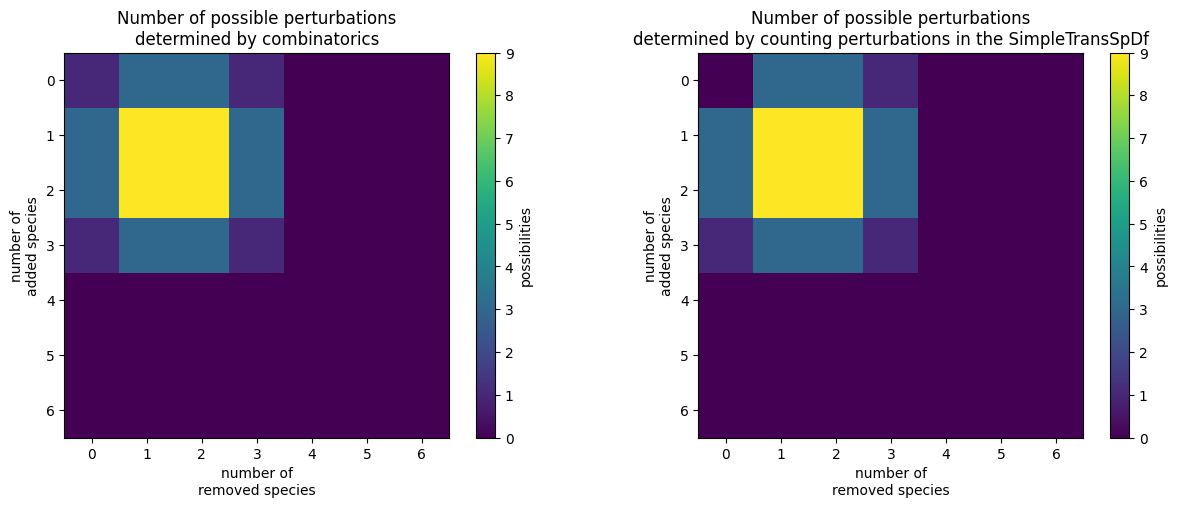

In [7]:
# Display/plot matrices

# Display Matrices
html_code = (
    '<div style="display: flex; flex-direction: row;">'
    '<div style="padding-right: 20px;">'
    f'{pandas.DataFrame(number_of_possible_perturbations_per_size_matrix_1).style.set_table_attributes("style=table-layout: fixed; width: 50%;").to_html()}'
    '</div>'
    '<div style="padding-right: 20px;">'
    f'{pandas.DataFrame(number_of_possible_perturbations_per_size_matrix_1).style.set_table_attributes("style=table-layout: fixed; width: 50%;").to_html()}'
    '</div>'
    '<div>'
)
display(HTML(html_code))

# Plotting
fig, axes = matplotlib.pyplot.subplots(1,2,figsize=(15,5))
c = axes[0].imshow(number_of_possible_perturbations_per_size_matrix_1)
c = axes[1].imshow(number_of_possible_perturbations_per_size_matrix_2)
for i in [0,1]:
    axes[i].set_xlabel('number of\nremoved species')
    axes[i].set_ylabel('number of\nadded species')
    fig.colorbar(c, ax=axes[i], label="possibilities")
axes[0].set_title('Number of possible perturbations\ndetermined by combinatorics')
axes[1].set_title('Number of possible perturbations\ndetermined by counting perturbations in the SimpleTransSpDf')

### 1.1.2  number_of_observed_perturbations_per_size_matrix

The matrix can be obtained accessing the RN.SimpleTransSpDf pandas.DataFrame and counting rows corresponding to the transition.
Note that the matrix values are not always integer numbers. When a perturbation leads to a closed set that is not an organization itself
the system can potentially transition to various different organizations that are subset of the closed set.

In [8]:
#########################################################
#-------------------------------------------------------#
initial_state    = random.choice(RN.SynStrOrgListBtArray)
convergent_state = random.choice(RN.SynStrOrgListBtArray)
max_perturbation_size = len(initial_state)
#-------------------------------------------------------#
#########################################################

number_of_observed_perturbations_by_size_matrix  = newdataframes.number_of_observed_perturbations_by_size_matrix(RN.SimpleTransSpDf, initial_state, convergent_state, max_perturbation_size)
number_of_possible_perturbations_per_size_matrix = newdataframes.number_of_possible_perturbations_by_size_matrix_using_combinatorics(initial_state)

fractions = [[0 for j in range(max_perturbation_size+1)] for i in range(max_perturbation_size+1)]
for i in range(len(fractions)):
        for j in range(len(fractions)):
            if number_of_possible_perturbations_per_size_matrix[i][j] > 0:
                fractions[i][j] = number_of_observed_perturbations_by_size_matrix[i][j]/number_of_possible_perturbations_per_size_matrix[i][j]

The initial state is:    111000
The convergent state is: 111000


,0,1,2,3,4,5,6
0,0.000000,2.000000,0,0,0,0,0
1,1.000000,2.000000,0,0,0,0,0
2,0.000000,0.000000,0,0,0,0,0
3,0.000000,0.000000,0,0,0,0,0
4,0.000000,0.000000,0,0,0,0,0
5,0.000000,0.000000,0,0,0,0,0
6,0.000000,0.000000,0,0,0,0,0
,0,1,2,3,4,5,6
0,1,3,3,1,0,0,0
1,3,9,9,3,0,0,0


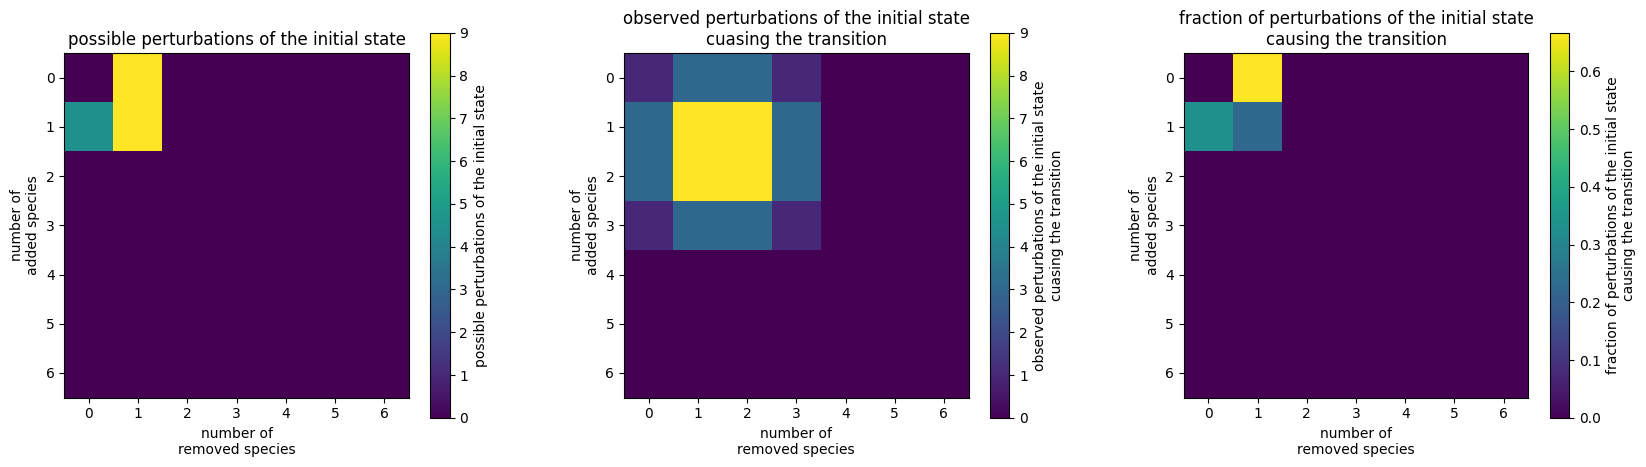

In [9]:
# Display/plot matrices

print(f'The initial state is:    {initial_state.to01()}')
print(f'The convergent state is: {convergent_state.to01()}')

# Display Matrices
html_code = (
    '<div style="display: flex; flex-direction: row;">'
    '<div style="padding-right: 20px;">'
    f'{pandas.DataFrame(number_of_observed_perturbations_by_size_matrix).style.set_table_attributes("style=table-layout: fixed; width: 33%;").to_html()}'
    '</div>'
    '<div style="padding-right: 20px;">'
    f'{pandas.DataFrame(number_of_possible_perturbations_per_size_matrix).style.set_table_attributes("style=table-layout: fixed; width: 33%;").to_html()}'
    '</div>'
    '<div>'
    f'{pandas.DataFrame(fractions).style.set_table_attributes("style=table-layout: fixed; width: 33%;").to_html()}'
    '</div>'
    '</div>'
)
display(HTML(html_code))

# Plotting
fig, axes = matplotlib.pyplot.subplots(1,3,figsize=(20,5))
axes[0].imshow(number_of_observed_perturbations_by_size_matrix)
c1 = axes[1].imshow(number_of_possible_perturbations_per_size_matrix)
c2 = axes[2].imshow(fractions)
for i in [0,1,2]:
    axes[i].set_xlabel('number of\nremoved species')
    axes[i].set_ylabel('number of\nadded species')
fig.colorbar(c1, ax=axes[0], label="possible perturbations of the initial state")
fig.colorbar(c1, ax=axes[1], label="observed perturbations of the initial state\ncuasing the transition")
fig.colorbar(c2, ax=axes[2], label="fraction of perturbations of the initial state\ncausing the transition")
axes[0].set_title("possible perturbations of the initial state")
axes[1].set_title("observed perturbations of the initial state\ncuasing the transition")
axes[2].set_title("fraction of perturbations of the initial state\ncausing the transition")
fig.subplots_adjust(wspace=0.3)

### 1.1.3 perturbation_size_probabilities_matrix

We want to define a perturbation_size_probabilities_matrix with probabilities such that perturbation_size_probabilities_matrix[i][j] the probability that a perturbation adds i species and removes j species. Obviously these probabilities have to depend on the number of species that are present. For example if only n species are present we can not remove i>n species.<br>

An idea to start with:<br>
Each species has a probability $\alpha$ to be affected by perturbation. This means that there is a probability of $\alpha$ that a species gets removed if it is present or added if it is not present.

In [10]:
#######################################
#-------------------------------------#
alpha = 0.125
initial_state = bitarray('00000101010')
#-------------------------------------#
#######################################

p_additive    = newdataframes.additive_probabilities(initial_state, alpha)
p_eliminative = newdataframes.eliminative_probabilities(initial_state, alpha)
p_matrix      = newdataframes.perturbation_size_probabilities_matrix(initial_state, alpha)

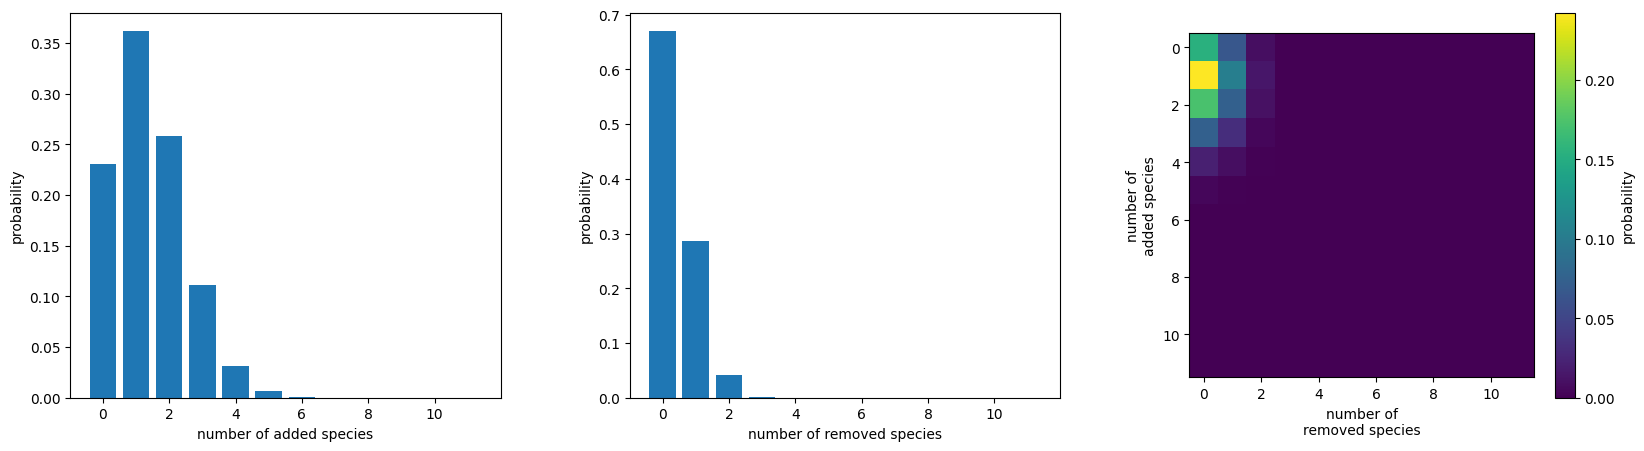

In [11]:
# Plot probability distributions

fig, axes = matplotlib.pyplot.subplots(1,3, figsize=(20,5))
axes[0].bar(range(len(p_additive)), p_additive)
axes[0].set_ylabel('probability')
axes[0].set_xlabel('number of added species')
axes[1].bar(range(len(p_eliminative)), p_eliminative)
axes[1].set_ylabel('probability')
axes[1].set_xlabel('number of removed species')
c = axes[2].imshow(p_matrix)
axes[2].set_xlabel('number of\nremoved species')
axes[2].set_ylabel('number of\nadded species')
fig.colorbar(c, ax=axes[2], label="probability")
matplotlib.pyplot.subplots_adjust(wspace=0.3)

### 1.1.4 Calculate transition probabilities

With the three matrices we can now calculate transition probabilities as<br>
$Σ_{i,j}(probabilities[i][j]*observed[i][j]/possible[i][j])$

In [12]:
#############
#-----------#
alpha = 0.125
#-----------#
#############

newdataframes.add_probabilities_to_transitions_df_1_1(RN.SimpleTransSpDf, transitions_df, alpha)

In [13]:
# Display transition probabilities grouped by initial state

for abstraction in list(abstractions_df['abstraction']):
    display(transitions_df.loc[transitions_df['initial_state']==abstraction])
    print(f'The sum of all transition probabilities starting in {abstraction}:')
    print(sum(list(transitions_df.loc[transitions_df['initial_state']==abstraction]['probability'])))

,initial_state,convergent_state,probability
0,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]",0.294399
1,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 1, 1, 1]",0.227509
2,"[0, 0, 0, 0, 0, 0]","[1, 1, 1, 0, 0, 0]",0.022430
3,"[0, 0, 0, 0, 0, 0]","[1, 1, 1, 1, 1, 1]",0.006866


The sum of all transition probabilities starting in frozenbitarray('000000'):
0.5512046813964844


,initial_state,convergent_state,probability
4,"[0, 0, 0, 1, 1, 1]","[0, 0, 0, 0, 0, 0]",0.013766
5,"[0, 0, 0, 1, 1, 1]","[0, 0, 0, 1, 1, 1]",0.566083
6,"[0, 0, 0, 1, 1, 1]","[1, 1, 1, 0, 0, 0]",0.001859
7,"[0, 0, 0, 1, 1, 1]","[1, 1, 1, 1, 1, 1]",0.117137


The sum of all transition probabilities starting in frozenbitarray('000111'):
0.6988451443612576


,initial_state,convergent_state,probability
8,"[1, 1, 1, 0, 0, 0]","[0, 0, 0, 0, 0, 0]",0.080154
9,"[1, 1, 1, 0, 0, 0]","[0, 0, 0, 1, 1, 1]",0.058518
10,"[1, 1, 1, 0, 0, 0]","[1, 1, 1, 0, 0, 0]",0.196703
11,"[1, 1, 1, 0, 0, 0]","[1, 1, 1, 1, 1, 1]",0.363470


The sum of all transition probabilities starting in frozenbitarray('111000'):
0.6988451443612576


,initial_state,convergent_state,probability
12,"[1, 1, 1, 1, 1, 1]","[0, 0, 0, 0, 0, 0]",0.002167
13,"[1, 1, 1, 1, 1, 1]","[0, 0, 0, 1, 1, 1]",0.136505
14,"[1, 1, 1, 1, 1, 1]","[1, 1, 1, 0, 0, 0]",0.013458
15,"[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]",0.399075


The sum of all transition probabilities starting in frozenbitarray('111111'):
0.5512046813964844


## 1.2 Parameterization by appearing and disappearing rates

# THIS METHOD DOES NOT WORK RELIABLY YET!
(It's not implemented completely and I have to find a way to compensate for numerical errors)

We can define appearing and disappearing rates for species.<br>
If all rates have the same value $\alpha$ the results should be the same as the ones from the method discussed in section 1

In [14]:
appearing_rates    = [numpy.random.random() for i in range(len(RN.SpIdStrArray))]
disappearing_rates = [numpy.random.random() for i in range(len(RN.SpIdStrArray))]

In [15]:
# Display rates

df1 = pandas.DataFrame({'appearing rates': appearing_rates})
df2 = pandas.DataFrame({'disappearing rates': disappearing_rates})
html_code = (
    '<div style="display: flex; flex-direction: row;">'
    '<div style="padding-right: 20px;">'
    f'{df1.style.set_table_attributes("style=table-layout: fixed; width: 50%;").to_html()}'
    '</div>'
    '<div style="padding-right: 20px;">'
    f'{df2.style.set_table_attributes("style=table-layout: fixed; width: 50%;").to_html()}'
    '</div>'
    '<div>'
)
display(HTML(html_code))

,appearing rates
0,0.575436
1,0.500479
2,0.865371
3,0.539194
4,0.071058
5,0.777057
,disappearing rates
0,0.485251
1,0.604188
2,0.550155


### 1.2.1 Calculating the probability of perturbations to occur

We can then asign probabilities directly to the perturbations.

In [16]:
#########################################################
#-------------------------------------------------------#
initial_state    = random.choice(RN.SynStrOrgListBtArray)
convergent_state = random.choice(RN.SynStrOrgListBtArray)
perturbation     = [random.randint(0,1) for i in range(len(initial_state))]
#-------------------------------------------------------#
#########################################################

print(f'The probability that the perturbation {perturbation} occurs when the system is in the organization {initial_state}:')
print(str(newdataframes.perturbation_probability_1_2(initial_state, perturbation, appearing_rates, disappearing_rates))+'\n')

# check correctness (Do probabilities add to 1up for all perturbations of an initial state?)
perturbations = list(set([frozenbitarray(p) for p in RN.SimpleTransSpDf.loc[RN.SimpleTransSpDf['initial state']==initial_state]['perturbation'].tolist()]))
probabilities = [newdataframes.perturbation_probability_1_2(initial_state, p, appearing_rates, disappearing_rates) for p in perturbations]
print(f'The sum of probabilities for all perturbation to occur when the system is in the organization {initial_state}:')
print(sum(probabilities))

The probability that the perturbation [0, 0, 0, 1, 0, 0] occurs when the system is in the organization bitarray('000111'):
0.0032049812591405814

The sum of probabilities for all perturbation to occur when the system is in the organization bitarray('000111'):
0.9998101282011724


We can add those values to the RN.SimpleTransSpDf pandas.DataFrame

In [17]:
newdataframes.add_perturbation_probabilities_to_SimpleTransSpDf(RN.SimpleTransSpDf, appearing_rates, disappearing_rates)

### 1.2.2 Calculating transition probabilities from perturbation probabilities

In [18]:
#########################################################
#-------------------------------------------------------#
initial_state    = random.choice(RN.SynStrOrgListBtArray)
convergent_state = random.choice(RN.SynStrOrgListBtArray)
#-------------------------------------------------------#
#########################################################

transition_probabilities = []
for i, convergent_state in enumerate(RN.SynStrOrgListBtArray):
    transition_probabilities.append(newdataframes.transition_probability_1_2(RN.SimpleTransSpDf, initial_state, convergent_state, appearing_rates, disappearing_rates))
    print(f'The probability to transition from {initial_state} to {convergent_state} : {transition_probabilities[i]}')
print(f'sum: {sum(transition_probabilities)}')  

The probability to transition from bitarray('000111') to bitarray('111000') : 0.18202648913521424
The probability to transition from bitarray('000111') to bitarray('000111') : 0.30596389655103196
The probability to transition from bitarray('000111') to bitarray('111111') : 0.3547115241726387
sum: 0.8427019098588848


# 2 conn = True

Markov models for additive perturbations where species must connect to the existing reaction network

In [19]:
RN.setSimpleTransDict(orglist=RN.SynStrOrgListBtArray,pert_type="species",pert_size=6,conn=True,closure=True, include_empty_set=True)

Simple Traansition for org 1 of 4
Simple Traansition for org 2 of 4
Simple Traansition for org 3 of 4
Simple Traansition for org 4 of 4


## 2.1 Uniform distribution

Assumption:<br>
All perurbations are equally likely to occur<br>

In [20]:
newdataframes.add_probabilities_to_transitions_df_2_1(RN.SimpleTransSpDf, transitions_df)

for initial_state in list(abstractions_df['abstraction']):
    display(transitions_df.loc[transitions_df['initial_state']==initial_state])
    print(f'The sum of all transition probabilities starting in {initial_state}:')
    print(sum(list(transitions_df.loc[transitions_df['initial_state']==initial_state]['probability'])))

,initial_state,convergent_state,probability,perturbations_of_initial_state,perturbations_causing_transition
0,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]",0.0,0,0.0
1,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 1, 1, 1]",0.0,0,0.0
2,"[0, 0, 0, 0, 0, 0]","[1, 1, 1, 0, 0, 0]",0.0,0,0.0
3,"[0, 0, 0, 0, 0, 0]","[1, 1, 1, 1, 1, 1]",0.0,0,0.0


The sum of all transition probabilities starting in frozenbitarray('000000'):
0.0


,initial_state,convergent_state,probability,perturbations_of_initial_state,perturbations_causing_transition
4,"[0, 0, 0, 1, 1, 1]","[0, 0, 0, 0, 0, 0]",0.285714,7,2.0
5,"[0, 0, 0, 1, 1, 1]","[0, 0, 0, 1, 1, 1]",0.714286,7,5.0
6,"[0, 0, 0, 1, 1, 1]","[1, 1, 1, 0, 0, 0]",0.000000,7,0.0
7,"[0, 0, 0, 1, 1, 1]","[1, 1, 1, 1, 1, 1]",0.000000,7,0.0


The sum of all transition probabilities starting in frozenbitarray('000111'):
0.9999999999999999


,initial_state,convergent_state,probability,perturbations_of_initial_state,perturbations_causing_transition
8,"[1, 1, 1, 0, 0, 0]","[0, 0, 0, 0, 0, 0]",0.714286,7,5.0
9,"[1, 1, 1, 0, 0, 0]","[0, 0, 0, 1, 1, 1]",0.000000,7,0.0
10,"[1, 1, 1, 0, 0, 0]","[1, 1, 1, 0, 0, 0]",0.285714,7,2.0
11,"[1, 1, 1, 0, 0, 0]","[1, 1, 1, 1, 1, 1]",0.000000,7,0.0


The sum of all transition probabilities starting in frozenbitarray('111000'):
0.9999999999999999


,initial_state,convergent_state,probability,perturbations_of_initial_state,perturbations_causing_transition
12,"[1, 1, 1, 1, 1, 1]","[0, 0, 0, 0, 0, 0]",0.158730,63,10.0
13,"[1, 1, 1, 1, 1, 1]","[0, 0, 0, 1, 1, 1]",0.476190,63,30.0
14,"[1, 1, 1, 1, 1, 1]","[1, 1, 1, 0, 0, 0]",0.095238,63,6.0
15,"[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]",0.269841,63,17.0


The sum of all transition probabilities starting in frozenbitarray('111111'):
1.0


# Fixing numerical errors

You may have noticed that some of the transition probabilities for transitions starting from the same initial state may not exactly sum up to 1 which will cause problems in the exploration of the longtime behaviour of the system

In [21]:
newdataframes.fix_transition_probabilities_for_all_initial_states(transitions_df)
for abstraction in list(abstractions_df['abstraction']):
    display(transitions_df.loc[transitions_df['initial_state']==abstraction])
    print(f'The sum of all transition probabilities starting in {abstraction}:')
    print(sum(list(transitions_df.loc[transitions_df['initial_state']==abstraction]['probability'])))

,initial_state,convergent_state,probability,perturbations_of_initial_state,perturbations_causing_transition
0,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]",0.25,0,0.0
1,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 1, 1, 1]",0.25,0,0.0
2,"[0, 0, 0, 0, 0, 0]","[1, 1, 1, 0, 0, 0]",0.25,0,0.0
3,"[0, 0, 0, 0, 0, 0]","[1, 1, 1, 1, 1, 1]",0.25,0,0.0


The sum of all transition probabilities starting in frozenbitarray('000000'):
1.0


,initial_state,convergent_state,probability,perturbations_of_initial_state,perturbations_causing_transition
4,"[0, 0, 0, 1, 1, 1]","[0, 0, 0, 0, 0, 0]",0.285714,7,2.0
5,"[0, 0, 0, 1, 1, 1]","[0, 0, 0, 1, 1, 1]",0.714286,7,5.0
6,"[0, 0, 0, 1, 1, 1]","[1, 1, 1, 0, 0, 0]",0.000000,7,0.0
7,"[0, 0, 0, 1, 1, 1]","[1, 1, 1, 1, 1, 1]",0.000000,7,0.0


The sum of all transition probabilities starting in frozenbitarray('000111'):
1.0


,initial_state,convergent_state,probability,perturbations_of_initial_state,perturbations_causing_transition
8,"[1, 1, 1, 0, 0, 0]","[0, 0, 0, 0, 0, 0]",0.714286,7,5.0
9,"[1, 1, 1, 0, 0, 0]","[0, 0, 0, 1, 1, 1]",0.000000,7,0.0
10,"[1, 1, 1, 0, 0, 0]","[1, 1, 1, 0, 0, 0]",0.285714,7,2.0
11,"[1, 1, 1, 0, 0, 0]","[1, 1, 1, 1, 1, 1]",0.000000,7,0.0


The sum of all transition probabilities starting in frozenbitarray('111000'):
1.0


,initial_state,convergent_state,probability,perturbations_of_initial_state,perturbations_causing_transition
12,"[1, 1, 1, 1, 1, 1]","[0, 0, 0, 0, 0, 0]",0.158730,63,10.0
13,"[1, 1, 1, 1, 1, 1]","[0, 0, 0, 1, 1, 1]",0.476190,63,30.0
14,"[1, 1, 1, 1, 1, 1]","[1, 1, 1, 0, 0, 0]",0.095238,63,6.0
15,"[1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1]",0.269841,63,17.0


The sum of all transition probabilities starting in frozenbitarray('111111'):
1.0


# Markov-model

,abstraction,local_resilience,global_resilience
0,"[0, 0, 0, 0, 0, 0]",0.250000,0.314100
1,"[0, 0, 0, 1, 1, 1]",0.714286,0.454080
2,"[1, 1, 1, 0, 0, 0]",0.285714,0.124274
3,"[1, 1, 1, 1, 1, 1]",0.269841,0.107545


,initial_state,convergent_state,probability,perturbations_of_initial_state,perturbations_causing_transition
0,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]",0.250000,0,0.0
1,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 1, 1, 1]",0.250000,0,0.0
2,"[0, 0, 0, 0, 0, 0]","[1, 1, 1, 0, 0, 0]",0.250000,0,0.0
3,"[0, 0, 0, 0, 0, 0]","[1, 1, 1, 1, 1, 1]",0.250000,0,0.0
4,"[0, 0, 0, 1, 1, 1]","[0, 0, 0, 0, 0, 0]",0.285714,7,2.0
5,"[0, 0, 0, 1, 1, 1]","[0, 0, 0, 1, 1, 1]",0.714286,7,5.0
6,"[0, 0, 0, 1, 1, 1]","[1, 1, 1, 0, 0, 0]",0.000000,7,0.0
7,"[0, 0, 0, 1, 1, 1]","[1, 1, 1, 1, 1, 1]",0.000000,7,0.0
8,"[1, 1, 1, 0, 0, 0]","[0, 0, 0, 0, 0, 0]",0.714286,7,5.0
9,"[1, 1, 1, 0, 0, 0]","[0, 0, 0, 1, 1, 1]",0.000000,7,0.0


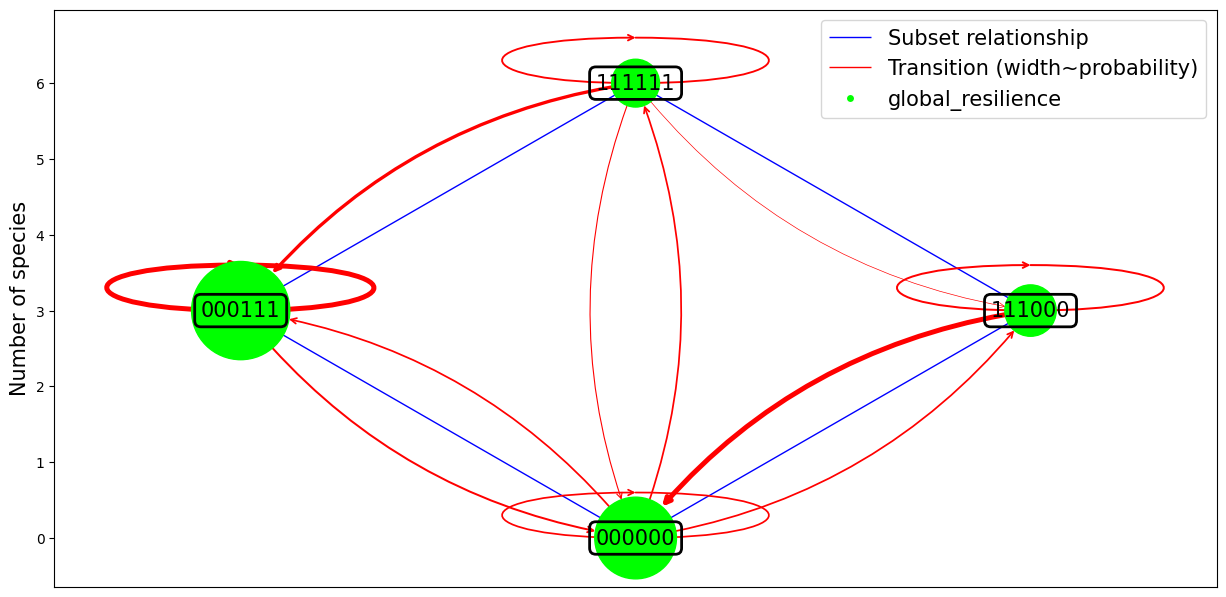

In [22]:
abstractions_df = markov.add_markov_properties_to_dataframe(abstractions_df, transitions_df)
display(abstractions_df)
display(transitions_df)

fig, axes = matplotlib.pyplot.subplots(figsize=(15,7.5))
plot_markov_new.plot_markov(axes, abstractions_df, transitions_df)

# Adding additional information to the dataframes

In [23]:
newdataframes.add_size_difference(transitions_df)
newdataframes.add_number_of_species(abstractions_df)
newdataframes.add_complexities(RN, abstractions_df, elem_type="generators")

display(abstractions_df)
display(transitions_df)

,abstraction,local_resilience,global_resilience,number of species,complexity
0,"[0, 0, 0, 0, 0, 0]",0.250000,0.314100,0,0.0
1,"[0, 0, 0, 1, 1, 1]",0.714286,0.454080,3,1.0
2,"[1, 1, 1, 0, 0, 0]",0.285714,0.124274,3,2.0
3,"[1, 1, 1, 1, 1, 1]",0.269841,0.107545,6,3.0


,initial_state,convergent_state,probability,perturbations_of_initial_state,perturbations_causing_transition,size_difference
0,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 0, 0, 0]",0.250000,0,0.0,0
1,"[0, 0, 0, 0, 0, 0]","[0, 0, 0, 1, 1, 1]",0.250000,0,0.0,3
2,"[0, 0, 0, 0, 0, 0]","[1, 1, 1, 0, 0, 0]",0.250000,0,0.0,3
3,"[0, 0, 0, 0, 0, 0]","[1, 1, 1, 1, 1, 1]",0.250000,0,0.0,6
4,"[0, 0, 0, 1, 1, 1]","[0, 0, 0, 0, 0, 0]",0.285714,7,2.0,-3
5,"[0, 0, 0, 1, 1, 1]","[0, 0, 0, 1, 1, 1]",0.714286,7,5.0,0
6,"[0, 0, 0, 1, 1, 1]","[1, 1, 1, 0, 0, 0]",0.000000,7,0.0,0
7,"[0, 0, 0, 1, 1, 1]","[1, 1, 1, 1, 1, 1]",0.000000,7,0.0,3
8,"[1, 1, 1, 0, 0, 0]","[0, 0, 0, 0, 0, 0]",0.714286,7,5.0,-3
9,"[1, 1, 1, 0, 0, 0]","[0, 0, 0, 1, 1, 1]",0.000000,7,0.0,0
